In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore',category=UserWarning)
import seaborn as sns
# importing the data
df=pd.read_csv("weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

  ### Here, we wanted to Display the amount of null values in each row so we can know what to drop and what to fill.

In [3]:
# displaying the amount of null values in each column
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

### These two columns had more than 50% null values which can be irrelevant and affect our calculations, so we dropped them out of the data set.

In [4]:
# we will be removing columns that have more than 50% data null and might be irrelevant to the analysis
df.drop(['Evaporation','Sunshine'],inplace=True,axis='columns')

### We chose to fill the missing values with the interpolation approach as it is more accurate for our dataset.

### The for loop is used to iterate over the numeric columns and fill the nulls using interpolation. Some null values will still remain after interpolating so we will drop them to ensure cleanliness of data.

In [8]:
# Here we will be dealing with the null values in the other columns by interpolating or removing the nulls accordingly
for x in df.select_dtypes(include = ['number']).columns:
    df[x] = df[x].interpolate(method='polynomial',order=2)
# after interpolating there are still some missing values so we will drop them as they're insignificant
df.dropna(inplace=True)
df.info()
df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              1
Rainfall             0
WindGustDir      10326
WindGustSpeed        1
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             2
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

### We split the date column into three columns. This will make the formatting easier for the visulaization in order to gain more insights. 
### It will also assist the encoding part so it can be less complicated.

In [202]:
# converting the date column into datetime type and then splitting it intro three columns year,month,day
from sklearn.preprocessing import LabelEncoder
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day']=df['Date'].dt.day
df.drop('Date',axis=1,inplace=True)

## After preprocessing, we split our data into (10,000) for training and (10,000) for testing

### Removing the targets from the test data. 

### Splitting our train data into features and targets.

In [203]:
# splitting the dataset into testing and training data
train_data=df[:10000]
test_data=df[10000:20000]
test_data=test_data.drop(['RainToday','RainTomorrow'],axis=1)
# splitting our training data into features and target
features=train_data.drop(['RainToday','RainTomorrow'],axis=1)
target=train_data[['RainToday','RainTomorrow']]
test_data

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,day
11651,CoffsHarbour,13.4,24.6,0.0,NE,20.0,W,NE,7.0,13.0,...,65.0,1019.800000,1017.400000,13.563017,4.622596,21.6,24.0,2016,5,6
11652,CoffsHarbour,12.1,24.5,0.0,E,20.0,SW,E,6.0,13.0,...,64.0,1021.200000,1018.900000,11.887263,4.302514,20.6,23.8,2016,5,7
11653,CoffsHarbour,13.6,25.6,0.0,NE,37.0,SW,NE,4.0,26.0,...,69.0,1020.600000,1015.700000,9.366258,4.094982,21.4,23.8,2016,5,8
11654,CoffsHarbour,20.2,27.8,0.0,N,48.0,NNW,NNE,28.0,28.0,...,73.0,1013.600000,1009.200000,6.000000,4.000000,23.2,24.6,2016,5,9
11655,CoffsHarbour,21.6,26.6,0.0,WSW,30.0,NW,NE,13.0,9.0,...,56.0,1009.800000,1007.600000,2.000000,4.017568,23.1,24.9,2016,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25846,Penrith,11.4,30.3,11.2,W,39.0,N,WSW,4.0,13.0,...,21.0,-2102.909677,-3818.193087,2407.062913,2652.796479,18.5,29.3,2013,11,13
25847,Penrith,13.0,30.2,0.0,NNW,35.0,SSE,NW,7.0,19.0,...,21.0,-2104.568912,-3822.324272,2409.674112,2655.395072,21.7,29.9,2013,11,14
25848,Penrith,14.4,26.3,0.0,WSW,39.0,SSW,ESE,7.0,19.0,...,81.0,-2106.222069,-3826.443671,2412.286723,2657.994893,19.9,21.6,2013,11,15
25849,Penrith,14.4,22.4,12.0,SE,39.0,SSW,SE,15.0,19.0,...,61.0,-2107.869146,-3830.551283,2414.900748,2660.595943,17.3,20.8,2013,11,16


## Visualizing the frequencies of some numerical features to see the count or the time of occurence of each one using a histogram.

C:\Users\CompuFast\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\CompuFast\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


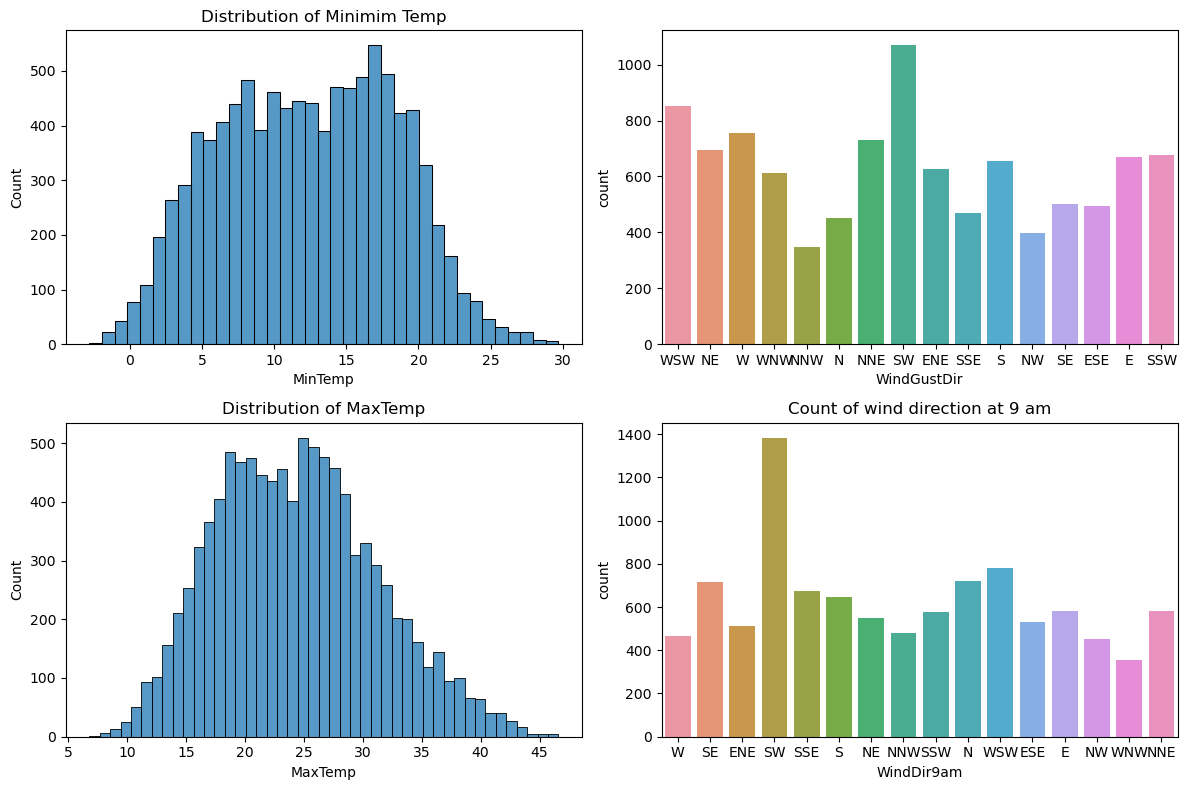

In [79]:
ig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# plotting distribution of MinTemp
sns.histplot(features['MinTemp'], ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Minimim Temp')
# plotting distribution of sibsp column
sns.countplot(data=features, x='WindGustDir', ax=axes[0, 1])
axes[1, 1].set_title('Count of windgust direction')
# plotting distribution of fare column
sns.histplot(features['MaxTemp'], ax=axes[1, 0])
axes[1, 0].set_title('Distribution of MaxTemp')
# plotting count of Sex
sns.countplot(data=features, x='WindDir9am', ax=axes[1, 1])
axes[1, 1].set_title('Count of wind direction at 9 am')

plt.tight_layout()

plt.show()

## We are visulizing the relationships between our feature columns so we can inspect our data better.

C:\Users\CompuFast\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\CompuFast\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\CompuFast\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\CompuFast\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

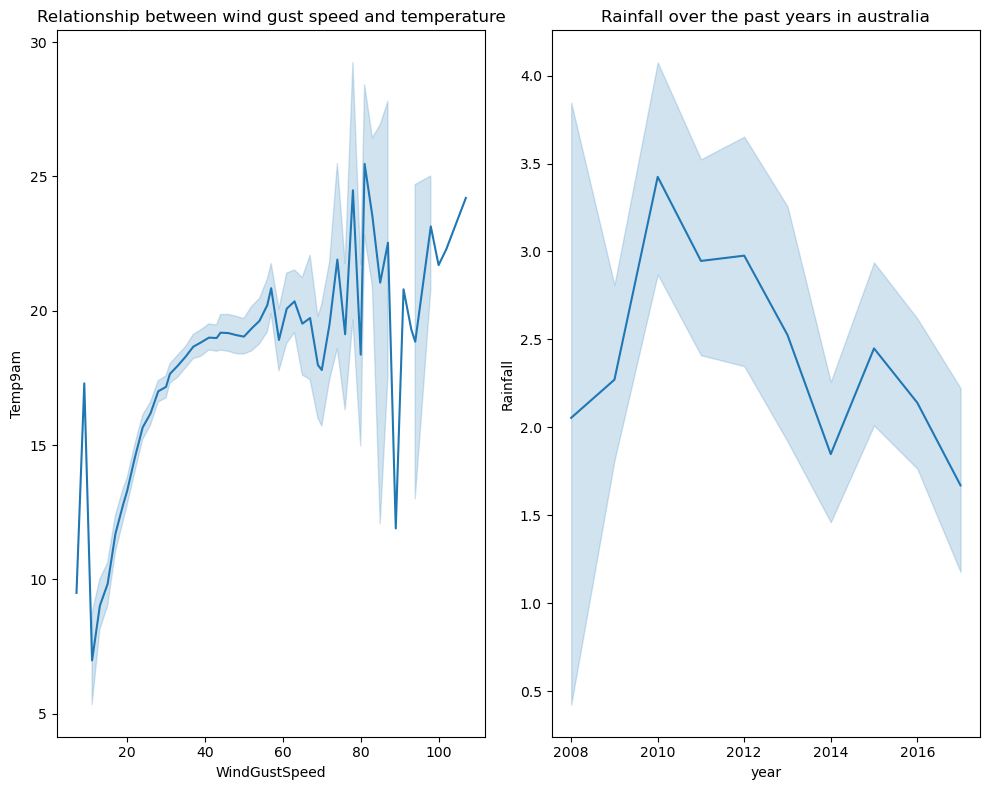

In [80]:
# here we'll be visualzing some relationships between our feature columns
fig, axes = plt.subplots(1, 2, figsize=(10, 8))
sns.lineplot(data=features,x='WindGustSpeed',y='Temp9am',ax=axes[0])
sns.lineplot(data=features,x='year',y='Rainfall',ax=axes[1])
axes[0].set_title('Relationship between wind gust speed and temperature')
axes[1].set_title('Rainfall over the past years in australia')

plt.tight_layout()

plt.show()

## Correlation matrix of our numerical data: 

### See the strength of the linear relations between our features. It ranges between -1 and 1. 

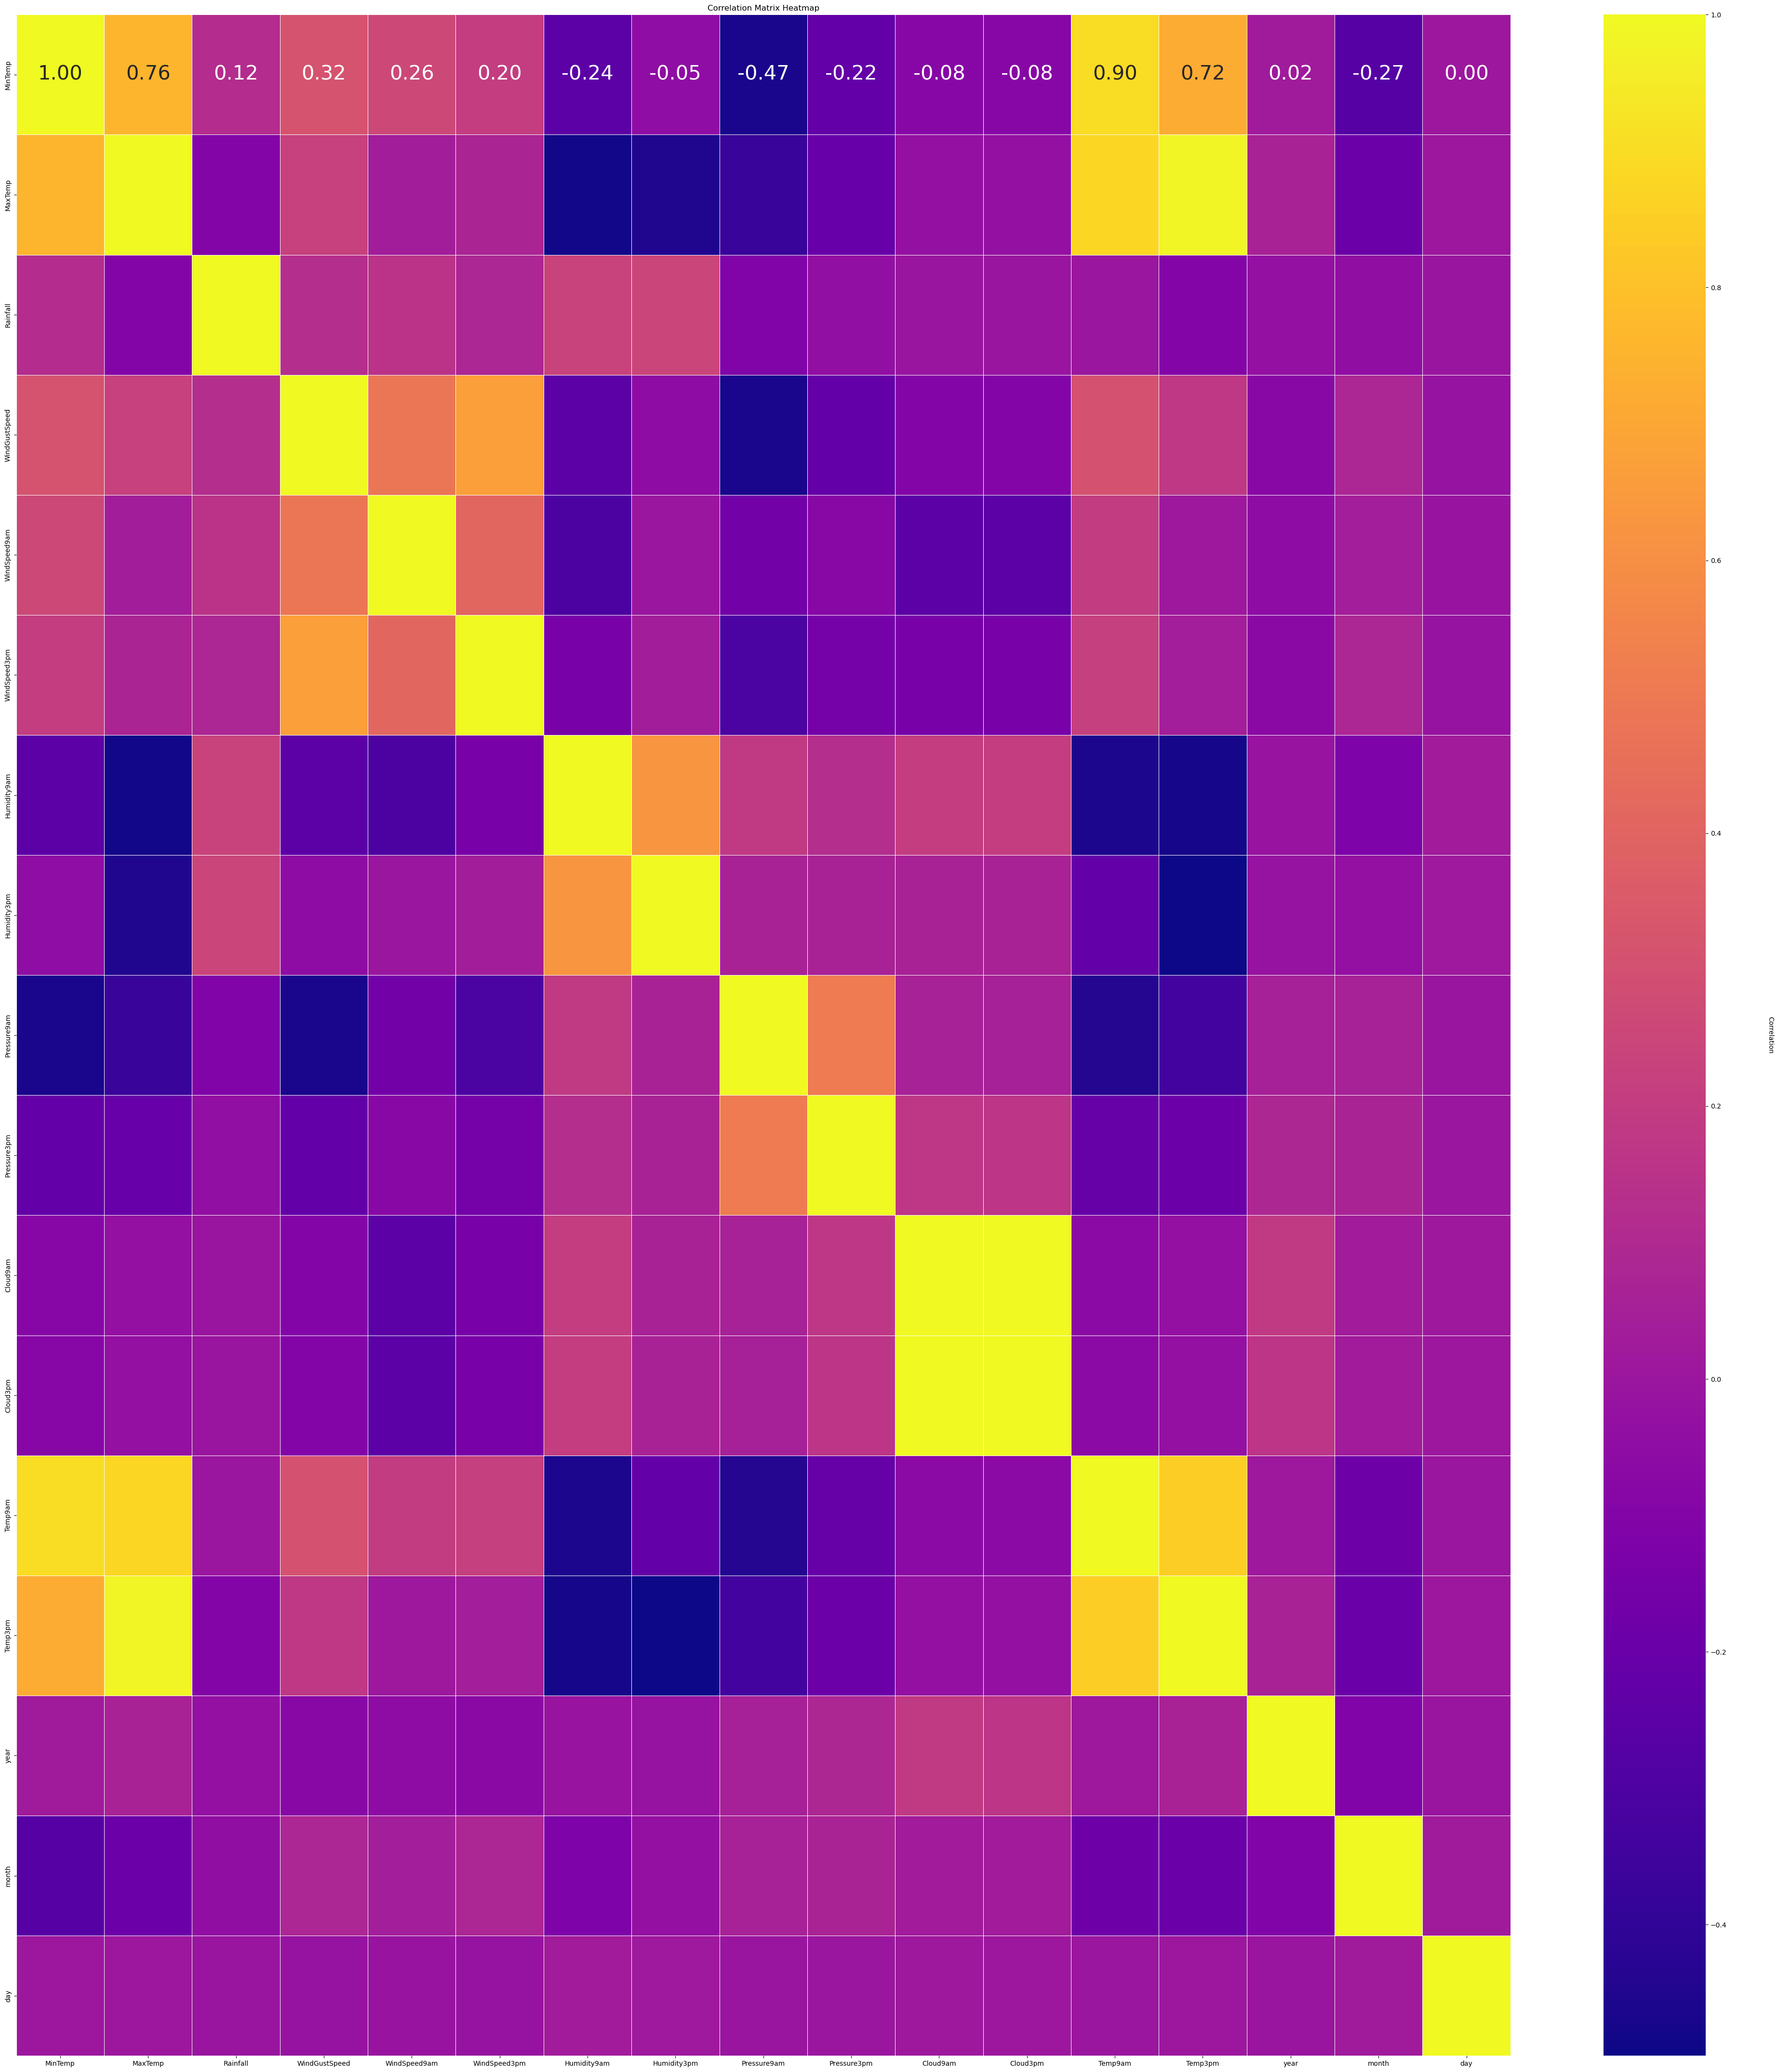

In [206]:
from matplotlib.colors import ListedColormap
# Here we will be plotting a correlation matrix of our numeric data
corr_matrix=features.select_dtypes(include = ['number']).corr()
plt.figure(figsize=(50,55))
heatmap=sns.heatmap(corr_matrix, annot=True, cmap='plasma', fmt='.2f', linewidths=0.5,annot_kws={"size": 30})
cbar = heatmap.collections[0].colorbar
cbar.set_label('Correlation', rotation=270, labelpad=70)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.title('Correlation Matrix Heatmap')
plt.show()

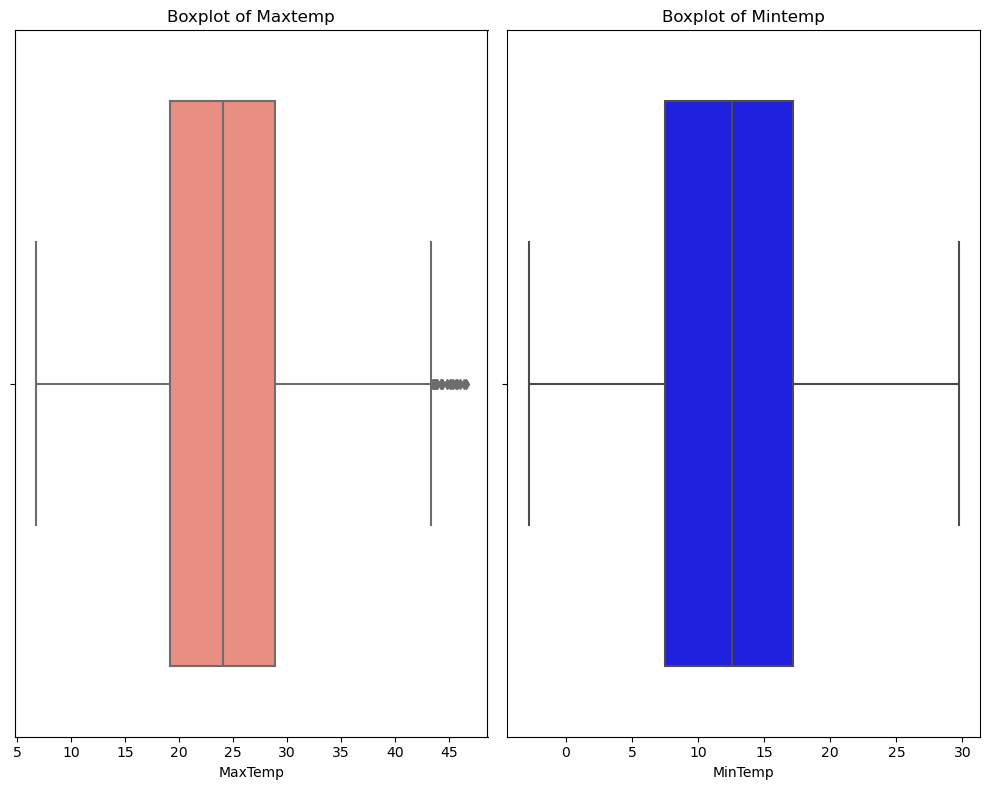

In [83]:
# here we'll be drawing boxplots on maxtemp and mintemp to visualize the median,quartiles, and outliers
fig, axes = plt.subplots(1, 2, figsize=(10, 8))
sns.boxplot(x=features['MaxTemp'],color='salmon',ax=axes[0])
sns.boxplot(x=features['MinTemp'],color='blue',ax=axes[1])
axes[0].set_title('Boxplot of Maxtemp')
axes[1].set_title('Boxplot of Mintemp')

plt.tight_layout()

plt.show()

# Start of our encoding 
## Encoding the target columns usig OneHotEncoder because yes and no aren't ordinal data they are binary categorical so (0,1).

### Checking the shape to ensure the similarity of the size between the features and the targets.

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

# encoding the target columns using one hot encoder to (0, 1)
for x in target.columns:
    target[x] = OneHotEncoder().fit_transform(target[[x]]).toarray()
target.shape
target

C:\Users\CompuFast\AppData\Local\Temp\ipykernel_10604\762574302.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target[x] = OneHotEncoder().fit_transform(target[[x]]).toarray()
C:\Users\CompuFast\AppData\Local\Temp\ipykernel_10604\762574302.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target[x] = OneHotEncoder().fit_transform(target[[x]]).toarray()


,RainToday,RainTomorrow
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
5,1.0,1.0
6,1.0,1.0
...,...,...
11646,1.0,0.0
11647,0.0,1.0
11648,1.0,1.0
11649,1.0,1.0


## Encoding the categorical features (data type = 'object' ) columns in the train and the test data.

In [85]:
# encoding categorical features of train dataset and testing dataset
categorical=features.select_dtypes(include=['object'])
for x in categorical.columns:
    features[x] = LabelEncoder().fit_transform(features[x])
    test_data[x]=LabelEncoder().fit_transform(test_data[x])
features.info()
features

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 2 to 11650
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       10000 non-null  int32  
 1   MinTemp        10000 non-null  float64
 2   MaxTemp        10000 non-null  float64
 3   Rainfall       10000 non-null  float64
 4   WindGustDir    10000 non-null  int32  
 5   WindGustSpeed  10000 non-null  float64
 6   WindDir9am     10000 non-null  int32  
 7   WindDir3pm     10000 non-null  int32  
 8   WindSpeed9am   10000 non-null  float64
 9   WindSpeed3pm   10000 non-null  float64
 10  Humidity9am    10000 non-null  float64
 11  Humidity3pm    10000 non-null  float64
 12  Pressure9am    10000 non-null  float64
 13  Pressure3pm    10000 non-null  float64
 14  Cloud9am       10000 non-null  float64
 15  Cloud3pm       10000 non-null  float64
 16  Temp9am        10000 non-null  float64
 17  Temp3pm        10000 non-null  float64
 18  year       

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,day
2,0,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,...,30.0,1007.6,1008.7,9.866887,2.000000,21.0,23.2,2008,12,3
3,0,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,...,16.0,1017.6,1012.8,9.025165,5.451790,18.1,26.5,2008,12,4
4,0,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,...,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,2008,12,5
5,0,14.6,29.7,0.2,14,56.0,13,13,19.0,24.0,...,23.0,1009.2,1005.4,3.791391,9.644629,20.6,28.9,2008,12,6
6,0,14.3,25.0,0.0,13,50.0,12,13,20.0,24.0,...,19.0,1009.6,1008.2,1.000000,10.385677,18.1,24.6,2008,12,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11646,3,20.1,27.2,0.0,8,56.0,4,11,17.0,37.0,...,87.0,1017.3,1016.4,11.630781,8.000000,25.9,21.5,2016,5,1
11647,3,13.4,25.6,3.1,7,37.0,14,4,2.0,17.0,...,68.0,1018.1,1013.6,12.665912,7.078342,21.4,24.1,2016,5,2
11648,3,14.8,26.2,0.0,7,30.0,13,0,9.0,13.0,...,53.0,1013.4,1009.5,13.613479,6.280327,22.5,25.1,2016,5,3
11649,3,11.1,25.1,0.0,12,20.0,15,2,6.0,13.0,...,45.0,1016.8,1014.9,14.378769,5.605956,21.3,24.4,2016,5,4


## Scaling our features and test data so they can be within the same range between 0 and 1. 

In [86]:
from sklearn.preprocessing import MinMaxScaler
# scaling our features using minmax algorithm
scaler=MinMaxScaler()
scaled_features=scaler.fit_transform(features)
# scaling our testing data
scaled_test=scaler.fit_transform(test_data)
len(scaled_features)
target

,RainToday,RainTomorrow
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
5,1.0,1.0
6,1.0,1.0
...,...,...
11646,1.0,0.0
11647,0.0,1.0
11648,1.0,1.0
11649,1.0,1.0


## The purpose of flattening the target column is to prepare the target data for training a neural network.

## We need the target variable to be in a specific format. Flattening the target column and converting it to a numpy array ensures that it matches the expected shape of the output layer of the network.

In [87]:
# flattening our target column so it matches our output layer in the network
import numpy as np
target_flat = target.apply(lambda x: x.flatten() if isinstance(x, np.ndarray) else x).to_numpy()
len(target_flat)
# target_flat

10000

### Using the train_test_split to split our data for modeling.

In [88]:
# splitting our data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(   scaled_features, target_flat, test_size=0.33, random_state=15)

# The start of our Neural Network model

### Our Neural network consists of four layers : 3 Hidden layers , 1 output layer:

##  Using the sigmoid function for binary classificatoin at the output layer with a threshold to ouput 0 or 1.

In [189]:
import tensorflow as tf    
# Here we will be building our model, testing it, and evaluating it on our test data

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(21,)),
    tf.keras.layers.Dense(50, activation='relu'), # hidden layer 1
    tf.keras.layers.Dense(50, activation='relu'), # hidden layer 2
    tf.keras.layers.Dense(25, activation='relu'), # hidden layer 3
    tf.keras.layers.Dense(2, activation='sigmoid') # output layer with 2 neurons for binary classification
])
# providing a summary of all the parameters in the model and calculating the number of trainable parameters
model.summary()

Model: "sequential_102"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_408 (Dense)                    │ (None, 50)                  │           1,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_409 (Dense)                    │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_410 (Dense)                    │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_411 (Dense)                    │ (None, 2)                   │              52 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,977 (19.44 KB)

 Trainable params: 4,977 (19.44 KB)

 Non-trainable params: 0 (0.00 B)

## Compiling the model and optimizing it for the fit step.

## Validating the model to evaluate the performance on a separate dataset and detecting overfitting.

## The goal during training is to minimize this loss function, which leads to improving the model's performance.

## The loss function measures how well the model's predictions match the true labels during training.  


## The loss function is 'binary_crossentropy' which is used for binary classification.  

In [190]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 
# training the model
model.fit(x_train, y_train, epochs=100, batch_size=50, validation_data=(x_test, y_test))

# Evaluating the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)
predictions = model.predict(x_test)


Epoch 1/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2801 - loss: 0.5506 - val_accuracy: 0.4636 - val_loss: 0.4702
Epoch 2/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4797 - loss: 0.4497 - val_accuracy: 0.7118 - val_loss: 0.4010
Epoch 3/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5616 - loss: 0.3766 - val_accuracy: 0.4797 - val_loss: 0.3627
Epoch 4/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5637 - loss: 0.3536 - val_accuracy: 0.7567 - val_loss: 0.3231
Epoch 5/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7016 - loss: 0.3299 - val_accuracy: 0.7009 - val_loss: 0.3207
Epoch 6/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7363 - loss: 0.3096 - val_accuracy: 0.6621 - val_loss: 0.3039
Epoch 7/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7343 - loss: 0.3101 - val_accuracy: 0.7336 - val_loss: 0.2984
Epoch 8/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7421 - loss: 0.2939 - val_accu

## Here we are testing different thresholds to determine which threshold has the highest accuracy when converting probability predictions into binary predictions.

## We are creating an array of threshold values ranging from 0.1 to 0.9. 

## This loop iterates over each threshold value in the thresholds array.


### For each threshold, it converts the probability predictions (predictions) into binary predictions 



 
### Then we calculate the accuracy of these binary predictions compared to the true labels (y_test) using the accuracy_score function.


### If the accuracy obtained with the current threshold is higher than the previous best accuracy, it updates the best_accuracy and best_threshold variables.


In [192]:
from sklearn.metrics import accuracy_score
# testing using different thresholds to know which is the most accurate using accuracy score

thresholds = np.arange(0.1, 1.0, 0.1) # threshold range from 0.1 - 0.9, step: 0.1

best_threshold = None
best_accuracy = 0

for threshold in thresholds:
    binary_predictions = (predictions >= threshold).astype(int)

    accuracy = accuracy_score(y_test, binary_predictions)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold

## Here we are making predictions on the test data using the trained model.


  .

## It uses a threshold (best_threshold) to convert the probability predictions into binary predictions (0 or 1).

In [193]:
# using our model on our test dataset to make predictions
predictions = model.predict(test_data)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step


In [194]:
# writing the test data Predictions in binary form as only 0,1 depending on the best threshold
binary_predictions = (predictions > best_threshold).astype(int)
binary_predictions

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])